<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   gender           100000 non-null  object 
 1   age          

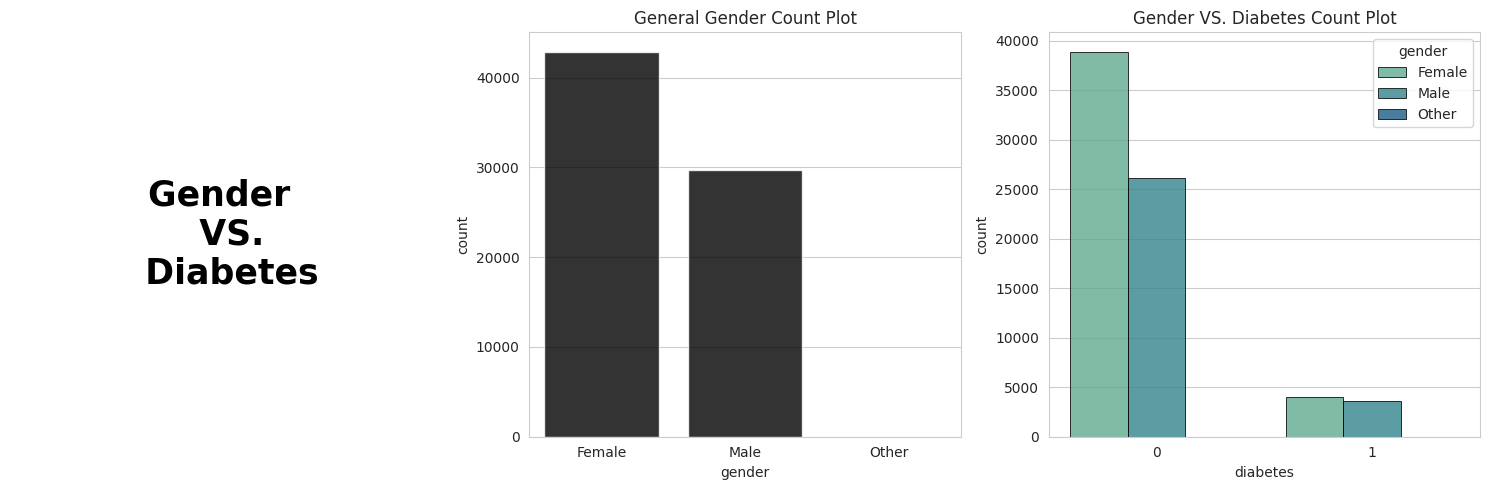

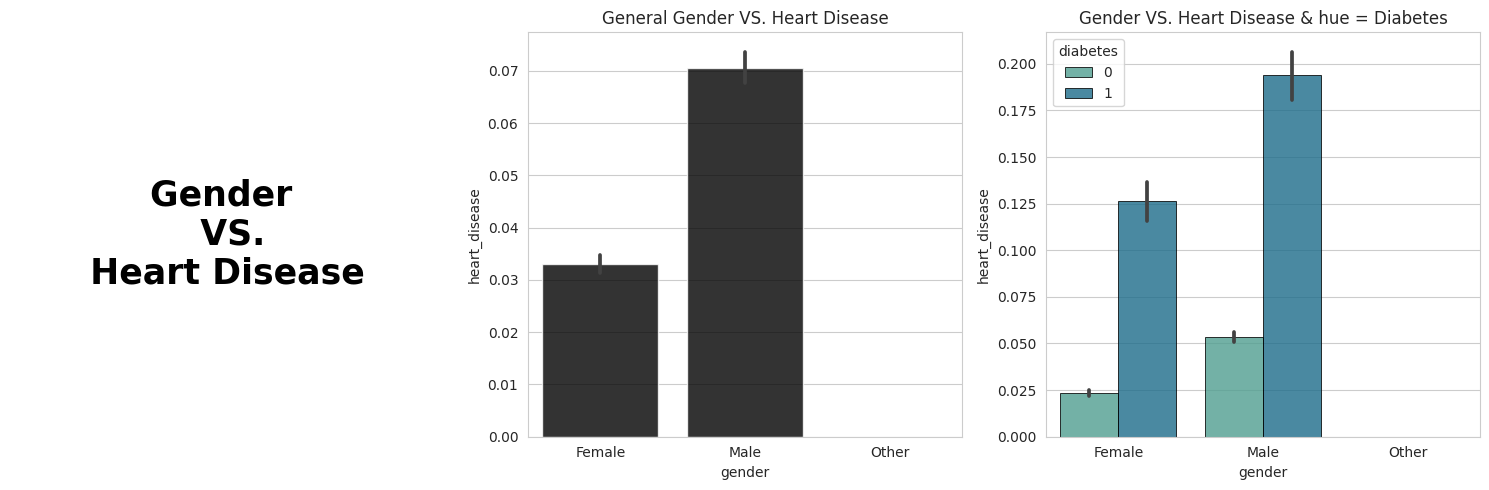

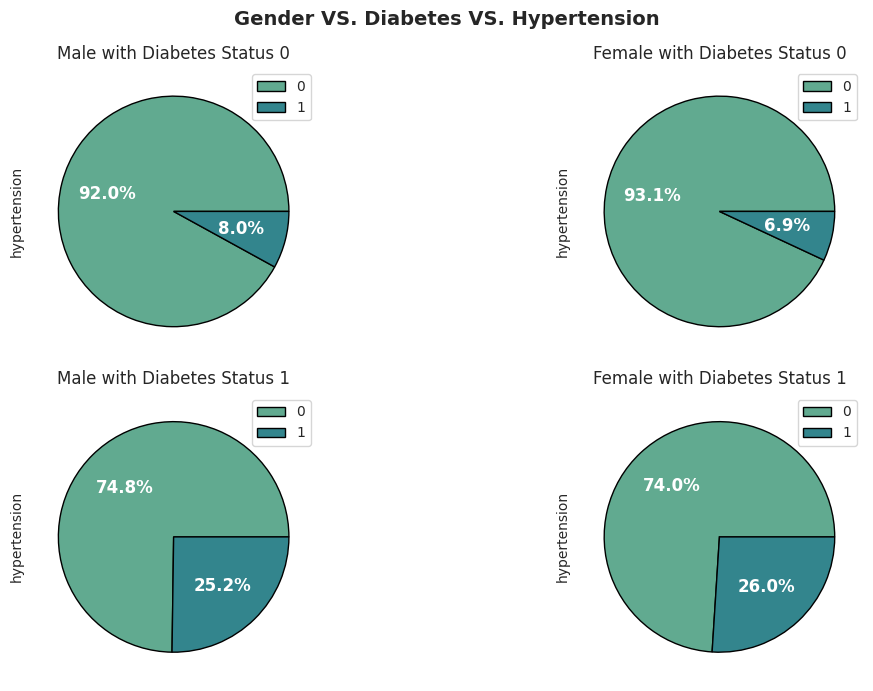

Text(0.5, 0.5, 'Age\n VS. \n Numerical Columns')

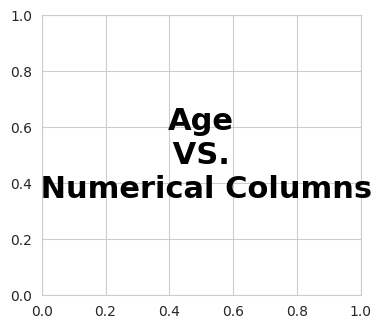

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
Url_diabets="https://raw.githubusercontent.com/seunghyeok35/-1/main/diabetes_prediction_dataset.csv"
df = pd.read_csv(Url_diabets)
df.head()
df.info()
df=df.drop(['HbA1c_level',"blood_glucose_level"],axis=1)
y_original = df['smoking_history']
y_original.head()
y_original_2=pd.get_dummies(y_original)
y_original_2.head()
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,1:], y_original_2['never'],stratify=y_original_2['never'], random_state=3)
X_train.head()
df.describe()
df.info()
df.isnull().sum()
df = df.drop_duplicates()
df.diabetes.value_counts(normalize = True).mul(100)
cat_cols = [x for x in df.dtypes.index if df.dtypes[x] == 'object']
for col in cat_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
pd.crosstab(df.gender, df.diabetes, margins = True)
fig = plt.figure(figsize = (15,5))

ax = plt.subplot(1,3,1)
ax.text(0.5, 0.5, "Gender \n  VS. \n Diabetes", fontdict={'fontsize': 25, 'fontweight': 'bold', 'color': 'black', 'ha': 'center', 'va': 'center'})
ax.axis('off')


plt.subplot(1,3, 2)

sns.countplot(x = df['gender'], color = "black",  alpha = 0.8, saturation =1)

plt.title("General Gender Count Plot")


plt.subplot(1,3, 3)
sns.countplot( x = df['diabetes'], hue = df['gender'],   palette='crest', linewidth = 0.7, alpha = 0.8, edgecolor = 'k', saturation =1)
plt.title("Gender VS. Diabetes Count Plot")

plt.tight_layout()
plt.show()    
fig = plt.figure(figsize = (15,5))
ax = plt.subplot(1,3,1)
ax.text(0.5, 0.5, "Gender \n  VS. \n Heart Disease ", fontdict={'fontsize': 25, 'fontweight': 'bold', 'color': 'black', 'ha': 'center', 'va': 'center'})
ax.axis('off')
plt.subplot(1,3, 2)

sns.barplot(x = 'gender' , y = 'heart_disease', data = df,  color = "black",  alpha = 0.8, saturation =1)
plt.title("General Gender VS. Heart Disease")


plt.subplot(1,3, 3)
sns.barplot(x = 'gender' , y = 'heart_disease', hue = 'diabetes' , data = df,  palette='crest', linewidth = 0.7, edgecolor = 'k',alpha = 0.8, saturation =1)
plt.title("Gender VS. Heart Disease & hue = Diabetes")

plt.tight_layout()
plt.show() 
pd.crosstab(df.gender, df.hypertension, margins = True)
fig = plt.figure(figsize=(13, 7))
subgroups = [('Male', 0), ('Female', 0), ('Male', 1), ('Female', 1)]


colors = sns.color_palette("crest", 3)


for i, subgroup in enumerate(subgroups):
    gender, diabetes = subgroup
    ax = plt.subplot(2, 2, i + 1)
    data = df[(df['gender'] == gender) & (df['diabetes'] == diabetes)]
    wedgeprops = {'linewidth': 1, 'edgecolor': 'black'}
    textprops = {'color': 'white', 'fontsize': 12, 'fontweight': 'bold'}
    data['hypertension'].value_counts().plot(kind='pie', colors=colors, wedgeprops=wedgeprops, textprops=textprops, autopct='%1.1f%%')

    plt.title(f'{gender} with Diabetes Status {diabetes}')

    plt.legend()

fig.suptitle("Gender VS. Diabetes VS. Hypertension", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
fig = plt.figure(figsize = (14,8))

ax = plt.subplot(2,3,1)
ax.text(0.5, 0.5, "Age\n VS. \n Numerical Columns", fontdict={'fontsize': 22, 'fontweight': 'bold', 'color': 'black', 'ha': 'center', 'va': 'center'})


<ipython-input-7-8d44aa8bf6b6>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = data['age'].astype(int)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 94133 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               94133 non-null  int64  
 1   age                  94133 non-null  int64  
 2   hypertension         94133 non-null  int64  
 3   heart_disease        94133 non-null  int64  
 4   smoking_history      94133 non-null  int64  
 5   bmi                  94133 non-null  float64
 6   HbA1c_level          94133 non-null  float64
 7   blood_glucose_level  94133 non-null  int64  
 8   diabetes             94133 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 7.2 MB


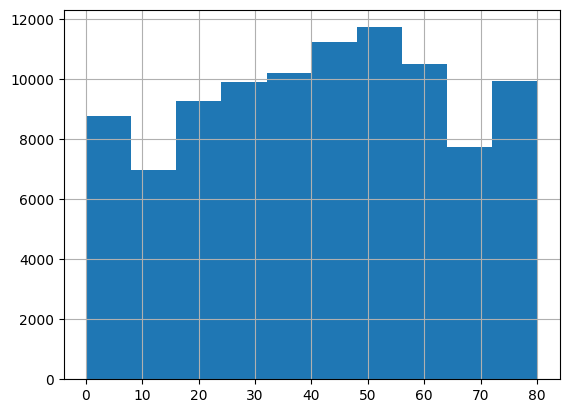

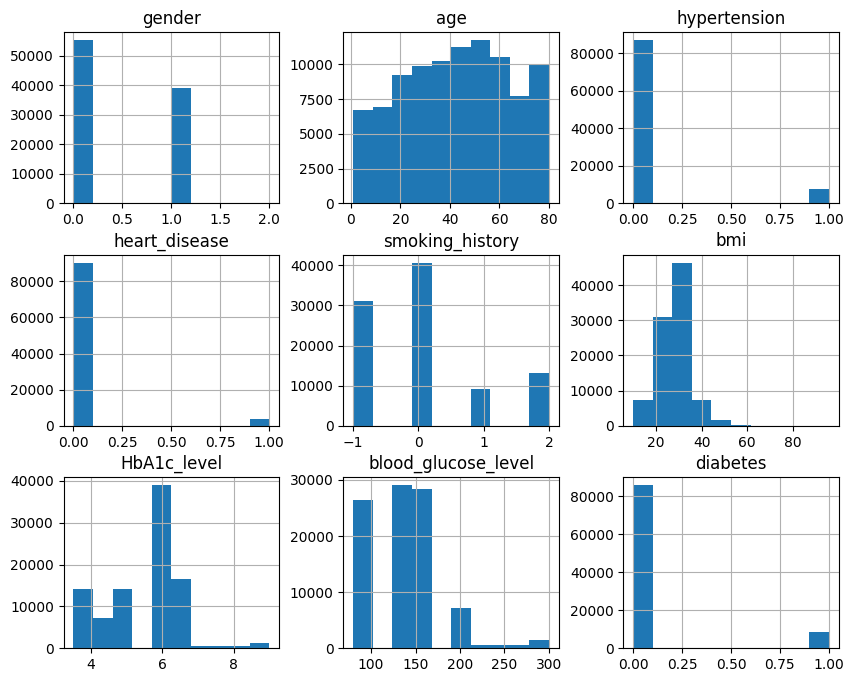

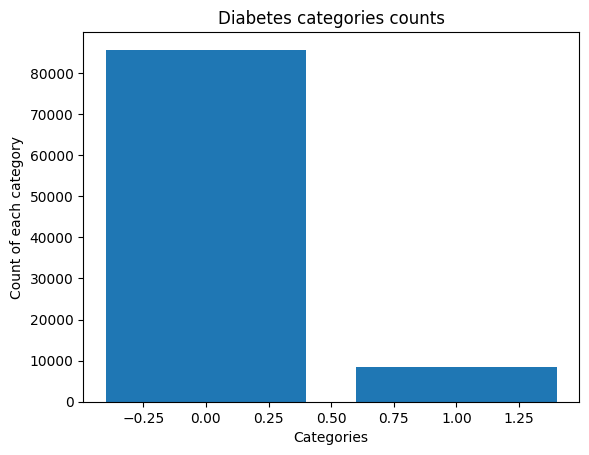

Count_of_0%: 90.9893448631192
Count_of_1%: 9.010655136880796


In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
data = pd.read_csv('https://raw.githubusercontent.com/seunghyeok35/-1/main/diabetes_prediction_dataset.csv')
data
data.isnull().sum()
data.drop_duplicates(inplace=True)
data
data['gender'].value_counts()
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data
data['smoking_history'].value_counts()
smoking_history_mapping = {'never': 0, 'No Info': -1, 'current': 2, 'former': 1, 'ever': 2, 'not current': 0}
data['smoking_history'] = data['smoking_history'].map(smoking_history_mapping)
data.describe()
data['age'].hist()
data = data[data['age'].mod(1) == 0]
data
data['age'] = data['age'].astype(int)
data.head()
data.info()
data.hist(bins=10, figsize=(10,8))
plt.show()
data['diabetes'].value_counts()
value_counts = data['diabetes'].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Categories')
plt.ylabel('Count of each category')
plt.title('Diabetes categories counts')
plt.show()
print('Count_of_0%: {}'.format(100 *(len(data[data['diabetes'] == 0])/len(data))))
print('Count_of_1%: {}'.format(100 *(len(data[data['diabetes'] == 1])/len(data))))
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
from sklearn import preprocessing
stand = preprocessing.StandardScaler()
X_train = stand.fit_transform(X_train)
X_test = stand.transform(X_test)

Epoch 1/5
2354/2354 [==============================] - 10s 3ms/step - loss: 0.1869 - accuracy: 0.9258 - val_loss: 0.1424 - val_accuracy: 0.9560
Epoch 2/5
2354/2354 [==============================] - 6s 3ms/step - loss: 0.1383 - accuracy: 0.9560 - val_loss: 0.1293 - val_accuracy: 0.9585
Epoch 3/5
2354/2354 [==============================] - 5s 2ms/step - loss: 0.1298 - accuracy: 0.9575 - val_loss: 0.1238 - val_accuracy: 0.9594
Epoch 4/5
2354/2354 [==============================] - 5s 2ms/step - loss: 0.1259 - accuracy: 0.9577 - val_loss: 0.1220 - val_accuracy: 0.9573
Epoch 5/5
2354/2354 [==============================] - 6s 3ms/step - loss: 0.1241 - accuracy: 0.9579 - val_loss: 0.1214 - val_accuracy: 0.9590


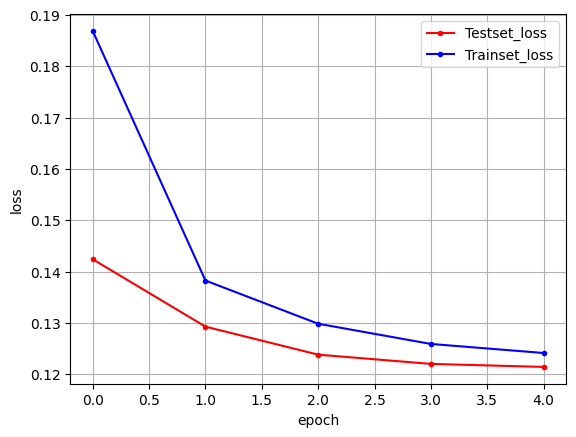

In [55]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu')) 
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
history = ann.fit(X_train, y_train, epochs=5, 
                              validation_data = (X_test, y_test),
                              callbacks=[early_stop])
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
import pandas as pd

# 깃허브에 준비된 데이터를 가져옵니다.

targetUrl="https://raw.githubusercontent.com/seunghyeok35/-1/main/diabetes_prediction_dataset.csv"


# 광물 데이터를 불러옵니다. 

df = pd.read_csv(targetUrl, header=None)


# 음파 관련 속성을 X로, 광물의 종류를 y로 저장합니다.
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
from sklearn import preprocessing
stand = preprocessing.StandardScaler()
X_train = stand.fit_transform(X_train)
X_test = stand.transform(X_test)

# 몇 겹으로 나눌 것인지를 정합니다. 
k=5

# KFold 함수를 불러옵니다. 분할하기 전에 샘플이 치우치지 않도록 섞어 줍니다.
kfold = KFold(n_splits=k, shuffle=True)

# 정확도가 채워질 빈 리스트를 준비합니다.
acc_score = []

def model_fn():
    model = Sequential() # 딥러닝 모델의 구조를 시작합니다.
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model


<ipython-input-47-7ff8be7d0dce>:16: DtypeWarning: Columns (1,2,3,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(targetUrl, header=None)


In [50]:
void batch_normalize(const float* x, int size, float* y, float* mean, float* var) {
    // df
    float sum = 0;
    for (int i = 0; i < size; i++) {
        sum += x[i];
    }
    *mean = sum / size;

    float sum_var = 0;
    for (int i = 0; i < size; i++) {
        sum_var += pow(x[i] - *mean, 2);
    }
    *var = sum_var / size;

    // 입력 데이터를 정규화
    for (int i = 0; i < size; i++) {
        y[i] = (x[i] - *mean) / sqrt(*var + epsilon);
    }
}




SyntaxError: ignored

In [67]:
class Dropout:
    def __init__(self,dropout_ratio = 0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self,x,train_flg = True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self,dout):
        return dout * self.mask
